<a href="https://colab.research.google.com/github/j-hossain/Intro-to-Deep-Learning/blob/main/Day%201/LineAssumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Building a dataset

Text(0, 0.5, 'Sy')

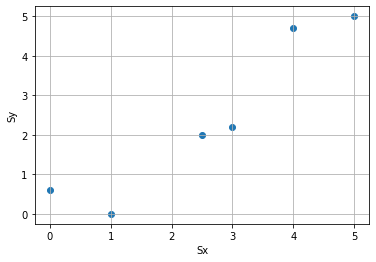

In [ ]:
Sx = np.array([0, 1, 2.5, 3, 4, 5])
Sy = np.array([0.6, 0, 2, 2.2, 4.7, 5])

# Plotting in graph
plt.scatter(Sx, Sy)

# Graph axis names and grids
plt.grid(True)
plt.xlabel('Sx')
plt.ylabel('Sy')

Lets assume a line 

$$y = mx + c$$

Where $m$ and $c$ are unknown, which we are trying to find.

We assume a random value for $m$ and $c$ ($m = 2$ and $c = 2$)

In [ ]:
m1 = tf.Variable(2, dtype=tf.float32)
m2 = tf.Variable(2, dtype=tf.float32)
m3 = tf.Variable(2, dtype=tf.float32)
m4 = tf.Variable(2, dtype=tf.float32)
m5 = tf.Variable(2, dtype=tf.float32)
m6 = tf.Variable(2, dtype=tf.float32)
c = tf.Variable(0.5, dtype=tf.float32)

def line_fn(x):
    xx = np.sin(x)
    xx2 = np.cos(x)
    return ((m1*xx2*xx2*xx*xx + m2*xx2*xx*xx + m3*xx2*xx + m4*xx + m5)*xx2 + m6)*xx2 + c 

Text(0, 0.5, 'Sy')

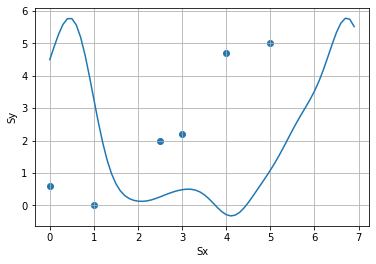

In [ ]:
p = np.arange(0, 7, 0.1)
plt.plot(p, line_fn(p).numpy())

# Plotting in graph
plt.scatter(Sx, Sy)

# Graph axis names and grids
plt.grid(True)
plt.xlabel('Sx')
plt.ylabel('Sy')

## Gradient descending algorithm:
$$m_{t} = m_{t-1} - lr \; \frac{\partial \;\; loss(l(x), y)}{\partial m} $$

$$loss(l(x), y) = (l(x) - y)^2$$

#### Here,

* $t$ = Time step
* $x$ = Input
* $y$ = Output
* $m$ = Updatable variable
* $loss(\cdot, \cdot)$ = Loss function
* $lr$ = Learning rate
* $l(\cdot)$ = Line function

#### Partial derivatives:

$\frac{\partial \;\; loss(l(x), y)}{\partial m} = (l(x) - y)^2$
$ = (mx+c-y)^2$
$ = 2(mx+c-y)x$

$\frac{\partial \;\; loss(l(x), y)}{\partial c} = (l(x) - y)^2$
$ = (mx+c-y)^2$
$ = 2(mx+c-y)$

In [132]:
# learning rate
lr = 0.08
total_steps = 800

for step in range(total_steps):
    print(f"Step {step+1:2}:")
    print("-"*30)

    with tf.GradientTape() as tape:
        # Printing value of the variables
        print(f"M1: {m1.numpy():.4f},M2: {m2.numpy():.4f},M3: {m3.numpy():.4f},M4: {m4.numpy():.4f},M5: {m5.numpy():.4f},M6: {m6.numpy():.4f}, C: {c.numpy():.4f}")
        
        # Stating what variables need to be partially differentiated and calibrated
        tape.watch([m1,m2,m3,m4,m5,m6, c])

        # Passing the points to the line function
        pred_y = line_fn(Sx)

        # Calculating the difference/loss of the output (pred_y) of the function
        # w.r.t. the known output (Sy)
        loss = (pred_y - Sy) * (pred_y - Sy)


    # Calculating the gradients w.r.t. the partially diff. parameters
    # and the generated output loss
    grads = tape.gradient(loss, [m1,m2,m3,m4,m5,m6, c])

    # Showing the output just for educational purposs
    print(f"M1_grad: {grads[0].numpy():.4f},M2_grad: {grads[1].numpy():.4f},M3_grad: {grads[2].numpy():.4f},M4_grad: {grads[3].numpy():.4f},M5_grad: {grads[4].numpy():.4f},M6_grad: {grads[5].numpy():.4f}, C_grad: {grads[6].numpy():.4f}")

    # Updating the gradients
    m1 = m1 - lr * grads[0]
    m2 = m2 - lr * grads[1]
    m3 = m3 - lr * grads[2]
    m4 = m4 - lr * grads[3]
    m5 = m5 - lr * grads[4]
    m6 = m6 - lr * grads[5]
    c = c - lr * grads[6]

    print()

Step  1:
------------------------------
M1: -1.9056,M2: 0.5353,M3: -7.9599,M4: -8.7312,M5: -3.1970,M6: -0.8545, C: 4.6516
M1_grad: 0.0001,M2_grad: -0.0001,M3_grad: 0.0001,M4_grad: 0.0000,M5_grad: 0.0000,M6_grad: 0.0000, C_grad: -0.0000

Step  2:
------------------------------
M1: -1.9056,M2: 0.5353,M3: -7.9599,M4: -8.7312,M5: -3.1970,M6: -0.8545, C: 4.6516
M1_grad: 0.0001,M2_grad: -0.0001,M3_grad: 0.0001,M4_grad: 0.0000,M5_grad: 0.0000,M6_grad: 0.0000, C_grad: -0.0000

Step  3:
------------------------------
M1: -1.9056,M2: 0.5354,M3: -7.9599,M4: -8.7312,M5: -3.1970,M6: -0.8545, C: 4.6516
M1_grad: 0.0001,M2_grad: -0.0001,M3_grad: 0.0001,M4_grad: 0.0000,M5_grad: 0.0000,M6_grad: 0.0000, C_grad: -0.0000

Step  4:
------------------------------
M1: -1.9056,M2: 0.5354,M3: -7.9599,M4: -8.7312,M5: -3.1970,M6: -0.8545, C: 4.6516
M1_grad: 0.0001,M2_grad: -0.0001,M3_grad: 0.0001,M4_grad: 0.0000,M5_grad: 0.0000,M6_grad: 0.0000, C_grad: -0.0000

Step  5:
------------------------------
M1: -1.9056,

## Lets check the final result

Text(0, 0.5, 'Sy')

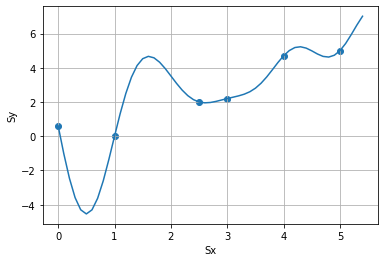

In [133]:
p = np.arange(0, 5.5, 0.1)
plt.plot(p, line_fn(p).numpy())

# Plotting in graph
plt.scatter(Sx, Sy)

# Graph axis names and grids
plt.grid(True)
plt.xlabel('Sx')
plt.ylabel('Sy')